<a href="https://colab.research.google.com/github/KeyDiVi/NLP_tests/blob/main/Multi_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# загружаем данные
import gdown
url = 'https://drive.google.com/uc?id=1C6Gd2F358wMuXszTk7EX9yEv0kbOgisc'
out = 'data.zip'
gdown.download(url, out, quiet=True)

'data.zip'

In [ ]:
!unzip -oq data.zip

In [ ]:
features = open('features.csv', 'r')
features_data = features.read().split('\n')[:-1]
features.close()

labels = open('labels.csv', 'r')
labels_data = labels.read().split('\n')[:-1]
labels.close()

X = features_data
y = list(map(int, labels_data))

In [ ]:
# разбиваем данные на обучающую и контрольную выборке
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)  # X, X, y, y
print(len(X_train), len(X_test), len(y_train), len(y_test))

2109 704 2109 704


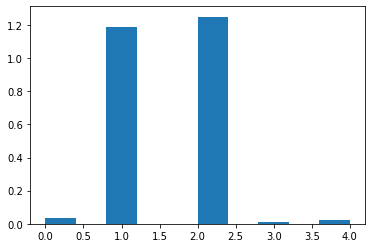

In [ ]:
# визуализируем данные (по графику видно, что в обучающей выборке преобладают 1 и 2 классы)
import matplotlib.pyplot as plt

plt.hist(y_train, density=True)
plt.show()

In [ ]:
# подключаем необходимые библиотеки
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
StopWords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# настраиваем векторайзер
def mo_preprecessor(s):
  return BeautifulSoup(s, 'html.parser').get_text().lower()
def mo_tokenizer(s):
  return [PorterStemmer().stem(w) for w in RegexpTokenizer('\w+').tokenize(s) if w not in StopWords]
tfidf = TfidfVectorizer(preprocessor=mo_preprecessor, tokenizer=mo_tokenizer)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

# разделяем обучающую выборку на собственно обучающую и валидационную
rim = len(X_train)//100*75
x_val = X_train[rim:]
x_train = X_train[:rim]
y_val = y_train[rim:]
y_train = y_train[:rim]

print(len(x_train), len(x_val), len(y_train), len(y_val))


x_train_tfidf = tfidf.fit_transform(x_train)

model = LogisticRegression()
model.fit(x_train_tfidf, y_train)  # обучаем логистическую регрессию на обучающей выборке

x_val_tfidf = tfidf.transform(x_val)
y_val_pred = model.predict(x_val_tfidf)  # оцениваем работу модели на валидационной выборке

print("Accuracy on train:", accuracy_score(y_val, y_val_pred))
print("F1-score on train:", f1_score(y_val, y_val_pred, average="micro"))

1575 534 1575 534
Accuracy on train: 0.9812734082397003
F1-score on train: 0.9812734082397003


In [ ]:
# оцениваем работу модели на контрольной выборке
x_test_tfidf = tfidf.transform(X_test)
y_test_pred = model.predict(x_test_tfidf)

print("Accuracy on test:", accuracy_score(y_test, y_test_pred))
print("F1-score on test:", f1_score(y_test, y_test_pred, average="micro"))

Accuracy on test: 0.9758522727272727
F1-score on test: 0.9758522727272727


In [ ]:
# проверяем верность класификатора (прредложения про погоду относятся к одному классу, предложения про еду - к другому)
text1 = ["it is good weather now"]
text2 = ["what's the weather?"]
text3 = ["today is hot and sunny"]
text4 = ["what is your favourite food?"]
text5 = ["cakes and donuts are delicious"]
text6 = ["isn't this meal tasty?"]
textlist = [text1, text3, text5, text4, text2, text6]
for text in textlist:
  typo = tfidf.transform(text)
  text_pred = model.predict(typo)
  print(text_pred, text)

[1] ['it is good weather now']
[1] ['today is hot and sunny']
[2] ['cakes and donuts are delicious']
[2] ['what is your favourite food?']
[1] ["what's the weather?"]
[2] ["isn't this meal tasty?"]
